3. You have a dataset named stock_prices.csv that contains daily stock prices of a company. The dataset has columns date and closing_price. Write a Python script to read the dataset, convert the date column to a datetime object, and then perform a time series analysis by plotting the closing price over time with a rolling 30-day moving average.

In [7]:
#Import the libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import io

In [8]:
#Download and load the dataset
file_id = '1F_LOzrBtu4EAbmb2bx9SufprVDXk0Atm'
url = f'https://drive.google.com/uc?id={file_id}'
download = requests.get(url).content
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [9]:
#View the data
df.head(10)

,date,closing_price
0,2023-07-01,150.0
1,2023-07-02,152.5
2,2023-07-03,155.2
3,2023-07-04,157.9
4,2023-07-05,159.8
5,2023-07-06,161.3
6,2023-07-07,163.1
7,2023-07-08,165.0
8,2023-07-09,168.2
9,2023-07-10,170.5


In [10]:
#View the shape of the dataframe
df.shape

(21, 2)

There are 21 rows with 2 columns

In [11]:
#View the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21 non-null     object 
 1   closing_price  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 464.0+ bytes


In [12]:
# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

In [13]:
#View the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21 non-null     datetime64[ns]
 1   closing_price  21 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 464.0 bytes


In [14]:
print(df)

         date  closing_price
0  2023-07-01          150.0
1  2023-07-02          152.5
2  2023-07-03          155.2
3  2023-07-04          157.9
4  2023-07-05          159.8
5  2023-07-06          161.3
6  2023-07-07          163.1
7  2023-07-08          165.0
8  2023-07-09          168.2
9  2023-07-10          170.5
10 2023-07-11          172.8
11 2023-07-12          173.5
12 2023-07-13          171.9
13 2023-07-14          170.0
14 2023-07-15          172.4
15 2023-07-16          173.6
16 2023-07-17          175.0
17 2023-07-18          176.3
18 2023-07-19          178.2
19 2023-07-20          179.8
20 2023-07-21          180.5


We could see that the data is already sorted and good to calculate moving average but we dont have a data for 30 days and having only for 21 days.

In [19]:
# Calculate the 30-day rolling mean
df['rolling_mean_30'] = df['closing_price'].rolling(window=30).mean()

In [20]:
print(df)

         date  closing_price  rolling_mean_30
0  2023-07-01          150.0              NaN
1  2023-07-02          152.5              NaN
2  2023-07-03          155.2              NaN
3  2023-07-04          157.9              NaN
4  2023-07-05          159.8              NaN
5  2023-07-06          161.3              NaN
6  2023-07-07          163.1              NaN
7  2023-07-08          165.0              NaN
8  2023-07-09          168.2              NaN
9  2023-07-10          170.5              NaN
10 2023-07-11          172.8              NaN
11 2023-07-12          173.5              NaN
12 2023-07-13          171.9              NaN
13 2023-07-14          170.0              NaN
14 2023-07-15          172.4              NaN
15 2023-07-16          173.6              NaN
16 2023-07-17          175.0              NaN
17 2023-07-18          176.3              NaN
18 2023-07-19          178.2              NaN
19 2023-07-20          179.8              NaN
20 2023-07-21          180.5      

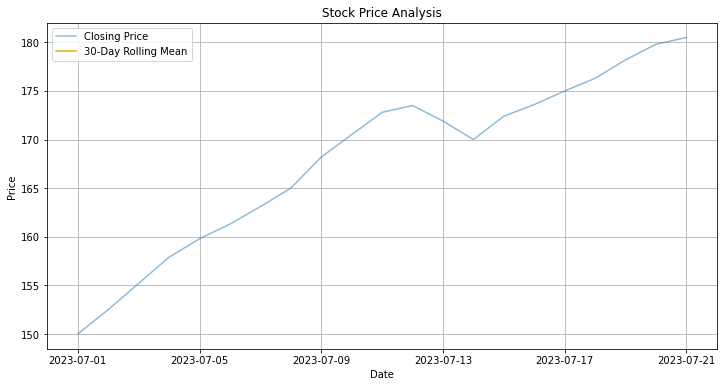

In [21]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['closing_price'], label='Closing Price', alpha=0.5)
plt.plot(df['date'], df['rolling_mean_30'], label='30-Day Rolling Mean', color='orange')
plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

We can try calculating the rolling average for a week based data and see the difference

In [22]:
# Calculate the 7-day rolling mean
df['rolling_mean_7'] = df['closing_price'].rolling(window=7).mean()

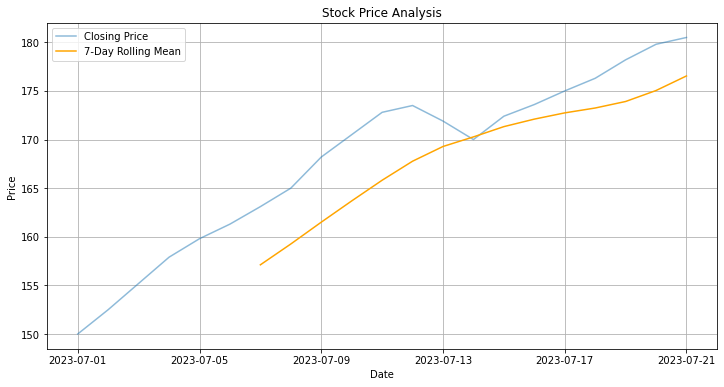

In [23]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['closing_price'], label='Closing Price', alpha=0.5)
plt.plot(df['date'], df['rolling_mean_7'], label='7-Day Rolling Mean', color='orange')
plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()